# League of Legends Early Game Analysis
*student Matyas Psenicka*

### Introduction
This project, coded in Python, discusses an early game statistics of one of the most popular MOBA games of all times. It puts somehow irregular simple game mechanism through machine learning algorithms to find out what in-game attributes have an impact on win conditions for either team.  Esports community is lately on the rise and I believe that analyzing game environments is going to become society's daily bread .. even sooner than you would think.

### Context
The game we will be analysing throughout this project is non other than League of Legends, further only as a shortcut - LOL. Since being created by Riot Games in 2009, it was always referred to such as a free MOBA(multiplayer online battle arena) game. Under constant development, first professional esport tournament happened within a release of Season 1, dated in 2011. The tournament consisted of the very best players of the game, later on called "pros", or "high elo ranked players", whose games we are going to analyse.

### How does it work
The current state of the game is quite complicated, I will try to explaing further on in this chapter, but if you'd prefer more detailed video version, you can check this [video](https://www.youtube.com/watch?v=0uyLRPmmYPk) to find out everything about LOL.

The game consists of two teams, each containing 5 players. Every player controls his champion, with different abilities and styles of play. Player guides champion through the playground and battle other playes in a player versus player combat. Each team occupies one half of the map, where they have their own turrets, inhibitors, and one main nexus. The point of the game is to defend mentioned buildings, because if the enemy team destroys your nexus, you lose. You can't simply go for the nexus, at least a few turrets and one inhibitor has to be taken down, before you can proceed to victory. Throughout the game player's champions become more powerful, with gaining gold and experience points, with which they can level up their abilities and purchase better items at the ingame shop. Because game is very well balanced, only player's gamestyle can decide, which team is going to do better and how it is going to show throughout the game. I've already mentioned attribtues such as experience points, or gold, but there're many more stats, monsters, minions, or side quests you can conquer, that will help you out in beating your enemy. 


### Keywords
 - attribute = game observable aspect such as gold earned, dragons killed, minions killed etc.
 - champion = an avatar which is guided(played) by the player himself
 - buff = temporary, or permanent beneficial status effect to the champion(s)
 - dragon = an elite monster which grants team gold and buffs after being killed
 - early game = basically the first 10-15 minutes of the game, when every player has at least 1 finished item
 - elo = rating system which is a method for calculating the relative skill levels of players
 - esports = video games which are played competetively for spectators
 - experience points(xp) = after killing minions, monsters and players champion gains xp and levels
 - first blood = an event, when first team kills first enemy champion - grants extra gold
 - gold = an ingame currency used to purchase items
 - herald = an elite monster which grants team gold and can be used to pulverize towers
 - inhibitors = special building, which doesn't do anything, but after being taken down grants advantage to the attacking team
 - item = champion holds up to 6 items in his inventory, which can be purchased in ingame store and grants champion extra abilities and statuses
 - jungle = area between lanes
 - jungle minion = sometimes refered to as monsters, they spawn in jungle
 - lane = game map has 3 lanes refered to as "top", "mid", and "bot"
 - minion = every 30 seconds 5 minions is spawned to each lane, sometimes refered to as "creeps"
 - nexus = main building, which doesn't do anything, has large amout of health, after taking it down, the attacking team wins
 - player = human being who plays(navigates, guides) a champion
 - rank(ranked) = rank is a current skill level of a player, ranked games are games, which affects rank
 - status = champion's damage, defence, movement speed etc.
 - style of play = champion's status determines how is it supposed to be played
 - turret = a building, which constantly attacks every visible enemy nearby, with fire rate approximately 0.83s a shot

### Dataset description
Firstly, I've gathered data of recorded games from website [kaggle.com](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min). Obtained dataset containes attributes from first 10 minutes of approximately 10 000 “high elo” ranked games, where players have very similar skill level. There are 19 stats(columns) for each team plus blueWins, and gameID columns, which is 40 in total, with winning as the target attribute. Which, as the name suggests, indicates whether the team has won, or not.

### Problem formulation
Majority of games these days with LOL as the most adequate representative, have the main goal set on winning. With this on mind, players talk all the time, about aspects of the game and how certain in-game attributes are more useful than other. 
As have been mentioned in previous chapter, there're lots of attributes that a player can obtain or interact with, which will boost his champion and will escalate his team effort to the moon. And, because there is so many, it will help us to analyse which make the biggest impact on the game, and, or, which are redundant. Which is by all means quite beneficiary for the players and, even, spectators.
Since many game-developers are trying to shorten the playtime of each game to allow players to be more versatile, the early game now gained a bigger meaning than ever before. With LOL’s average game time now standing at 35 minutes a game, and “high elo” players being very consistent, I want to analyse the very first 10-15 minutes of each game, as I see this part of the game as the most impactful.

### Research questions
 - What stats have the biggest impact on team’s victory stat?
 - What stats have the worst impact on team’s victory stat?
 - Is number of placed wards crucial for team to become victorious?


## Structure of the dataset
Firstly I am going to gatcher and load the data into a dataset "df" variable. Then for the research questions purposes I am going to create a new column regarding wards placed difference, and cast away redundant attributes.  Finally, I am going to check if all the data is placed, and named correctly, if not - I'll rename it to my liking. This way I am going to form an useful, readable dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from math import e

In [2]:
df = pd.read_csv('./data/high_diamond_ranked_10min.csv')
df['blueWardsDiff'] = df['blueWardsPlaced'] - df['redWardsPlaced']
df.head(10)

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   
5  4475365709         1               18                   0               0   
6  4493010632         1               18                   3               1   
7  4496759358         0               16                   2               0   
8  4443048030         0               16                   3               0   
9  4509433346         1               13                   1               1   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   
5          5           3            6                  1            1  ...   
6          7           6            7                  1            1  ...   
7          5          13            3                  0            0  ...   
8          7           7            8                  0            0  ...   
9          4           5            5                  1            1  ...   

   redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0         16567          6.8               17047                    197   
1         17620          6.8               17438                    240   
2         17285          6.8               17254                    203   
3         16478          7.0               17961                    235   
4         17404          7.0               18313                    225   
5         15201          7.0               18060                    221   
6         14463          6.4               15404                    164   
7         17920          6.6               16938                    157   
8         18380          7.2               19298                    240   
9         16605          6.8               18379                    247   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4                           67         1004               -230         22.5   
5                           59         -698               -101         22.1   
6                           35        -2411              -1563         16.4   
7                           54         2615                800         15.7   
8                           53         1979                771         24.0   
9                           43         1548               1574         24.7   

   redGoldPerMin  blueWardsDiff  
0         1656.7             13  
1         1762.0              0  
2         1728.5              0  
3         1647.8             28  
4         1740.4             58  
5         1520.1            -18  
6         1446.3            -39  
7         1792.0              1  
8         1838.0              1  
9         1660.5             -3  

[10 rows x 41 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
df = df.rename(columns=lambda x: re.sub('blue','',x[0:4] + x[4].lower() + x[5:]))
r = re.compile("red+")
red_team_attributes = list(filter(r.match, df.columns.tolist()))
redundant_attributes = ['gameid', 'totalExperience', 'totalGold', 'wardsPlaced', 'wardsDestroyed', 'cSPerMin', 'goldPerMin', 'eliteMonsters', 'goldDiff', 'experienceDiff', 'assists', 'avgLevel']
cc = red_team_attributes + redundant_attributes
df.drop(cc, axis=1, inplace = True)
df.head(10)

wins  firstBlood  kills  deaths  dragons  heralds  towersDestroyed  \
0     0           1      9       6        0        0                0   
1     0           0      5       5        0        0                0   
2     0           0      7      11        1        0                0   
3     0           0      4       5        0        1                0   
4     0           0      6       6        0        0                0   
5     1           0      5       3        1        0                0   
6     1           1      7       6        1        0                0   
7     0           0      5      13        0        0                0   
8     0           0      7       7        0        0                0   
9     1           1      4       5        1        0                0   

   totalMinionsKilled  totalJungleMinionsKilled  wardsDiff  
0                 195                        36         13  
1                 174                        43          0  
2                 186                        46          0  
3                 201                        55         28  
4                 210                        57         58  
5                 225                        42        -18  
6                 225                        53        -39  
7                 209                        48          1  
8                 189                        61          1  
9                 220                        39         -3

## EDA - Exploratory Data Analysis

### 1. Introductory Details About Data
Here I will be checking dimensions of my structured dataset, its data types and get a general undestanding of how my dataset turned out after structuring it

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   wins                      9879 non-null   int64
 1   firstBlood                9879 non-null   int64
 2   kills                     9879 non-null   int64
 3   deaths                    9879 non-null   int64
 4   dragons                   9879 non-null   int64
 5   heralds                   9879 non-null   int64
 6   towersDestroyed           9879 non-null   int64
 7   totalMinionsKilled        9879 non-null   int64
 8   totalJungleMinionsKilled  9879 non-null   int64
 9   wardsDiff                 9879 non-null   int64
dtypes: int64(10)
memory usage: 771.9 KB


In [6]:
df.head()

wins  firstBlood  kills  deaths  dragons  heralds  towersDestroyed  \
0     0           1      9       6        0        0                0   
1     0           0      5       5        0        0                0   
2     0           0      7      11        1        0                0   
3     0           0      4       5        0        1                0   
4     0           0      6       6        0        0                0   

   totalMinionsKilled  totalJungleMinionsKilled  wardsDiff  
0                 195                        36         13  
1                 174                        43          0  
2                 186                        46          0  
3                 201                        55         28  
4                 210                        57         58

In [7]:
df.tail()

wins  firstBlood  kills  deaths  dragons  heralds  towersDestroyed  \
9874     1           1      7       4        1        0                0   
9875     1           0      6       4        1        0                0   
9876     0           0      6       7        0        0                0   
9877     0           1      2       3        1        0                0   
9878     1           1      6       6        0        0                0   

      totalMinionsKilled  totalJungleMinionsKilled  wardsDiff  
9874                 211                        69        -29  
9875                 233                        48         42  
9876                 210                        45          9  
9877                 224                        48        -52  
9878                 207                        44          9

### 2. Statistical insight
To fully understand what I'm working with, I'll use the dataframe description method

In [8]:
df.describe()

wins   firstBlood        kills       deaths      dragons  \
count  9879.000000  9879.000000  9879.000000  9879.000000  9879.000000   
mean      0.499038     0.504808     6.183925     6.137666     0.361980   
std       0.500024     0.500002     3.011028     2.933818     0.480597   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     4.000000     4.000000     0.000000   
50%       0.000000     1.000000     6.000000     6.000000     0.000000   
75%       1.000000     1.000000     8.000000     8.000000     1.000000   
max       1.000000     1.000000    22.000000    22.000000     1.000000   

           heralds  towersDestroyed  totalMinionsKilled  \
count  9879.000000      9879.000000         9879.000000   
mean      0.187974         0.051422          216.699565   
std       0.390712         0.244369           21.858437   
min       0.000000         0.000000           90.000000   
25%       0.000000         0.000000          202.000000   
50%       0.000000         0.000000          218.000000   
75%       0.000000         0.000000          232.000000   
max       1.000000         4.000000          283.000000   

       totalJungleMinionsKilled    wardsDiff  
count               9879.000000  9879.000000  
mean                  50.509667    -0.079664  
std                    9.898282    25.960582  
min                    0.000000  -260.000000  
25%                   44.000000    -4.000000  
50%                   50.000000     0.000000  
75%                   56.000000     4.000000  
max                   92.000000   234.000000

### 3. Data Cleaning
To ensure that my data will be relevant and tidy, I will check if there're any unwanted values among my data, such as NaN, null, None or duplicates

In [9]:
df.isna().sum()

wins                        0
firstBlood                  0
kills                       0
deaths                      0
dragons                     0
heralds                     0
towersDestroyed             0
totalMinionsKilled          0
totalJungleMinionsKilled    0
wardsDiff                   0
dtype: int64

In [10]:
df.head()

wins  firstBlood  kills  deaths  dragons  heralds  towersDestroyed  \
0     0           1      9       6        0        0                0   
1     0           0      5       5        0        0                0   
2     0           0      7      11        1        0                0   
3     0           0      4       5        0        1                0   
4     0           0      6       6        0        0                0   

   totalMinionsKilled  totalJungleMinionsKilled  wardsDiff  
0                 195                        36         13  
1                 174                        43          0  
2                 186                        46          0  
3                 201                        55         28  
4                 210                        57         58

In [11]:
df.duplicated().sum()

0

### 4. Data Visualization
I see data visualization as one of the most important steps to fully understand the data. So first I'll use boxplots to search for outliers. Next I'll visualize nan values, and the overall correlation between columns using seaborn's heatmaps. Finally I'll standardize the data using sklearn's z-scoring with StandardScaler and perform a PCA (principal component analysis) to search for any obvious patterns in the relevance of each column to the variance in my data.

<AxesSubplot:>

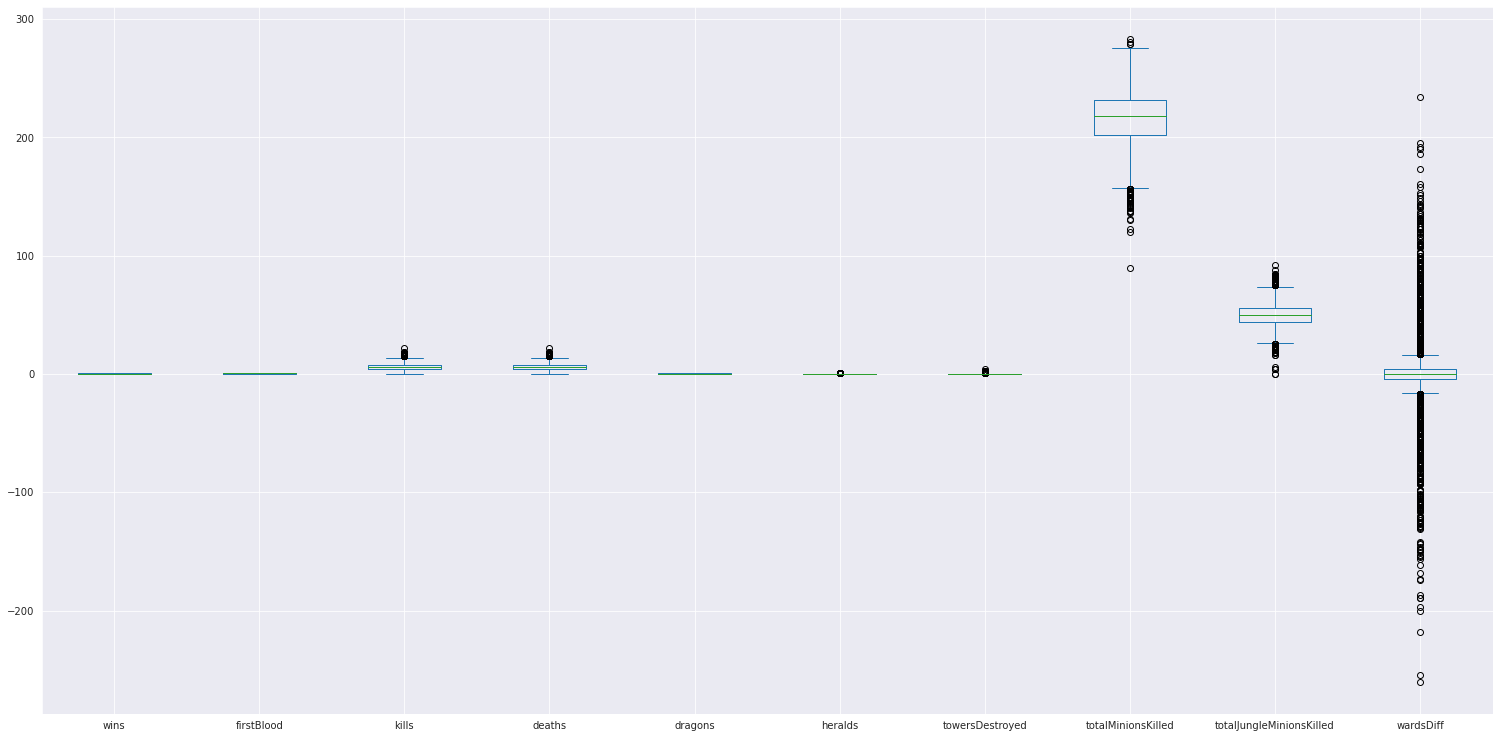

In [36]:
df.plot(kind="box", figsize=(26,13))

In [13]:
df.mean()

wins                          0.499038
firstBlood                    0.504808
kills                         6.183925
deaths                        6.137666
dragons                       0.361980
heralds                       0.187974
towersDestroyed               0.051422
totalMinionsKilled          216.699565
totalJungleMinionsKilled     50.509667
wardsDiff                    -0.079664
dtype: float64

In [14]:
sns.set_style('darkgrid')
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)

<AxesSubplot:>

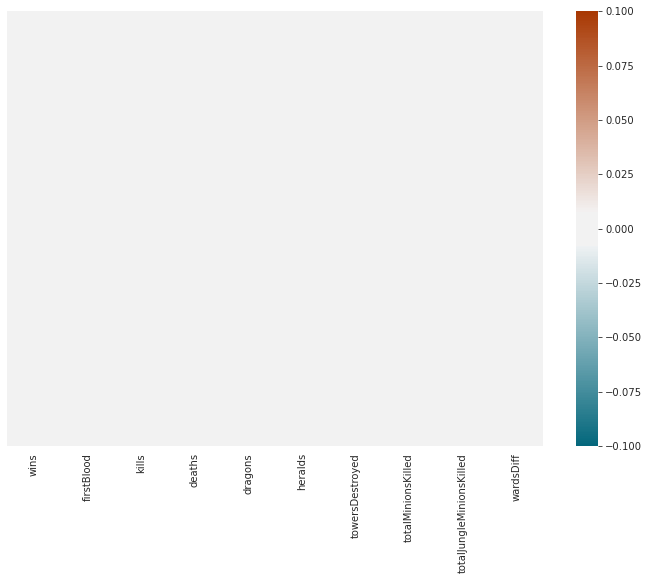

In [15]:
plt.figure(figsize = (12,8))
sns.heatmap(df.isna(), cmap = cmap, yticklabels = False)

In [16]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), vmin = 0, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

<AxesSubplot:>

In [17]:
#Z-score all values
df_without_wins = df.drop(['wins'], axis=1)
scaler = StandardScaler()
scaler.fit(df_without_wins)
scaled_data = scaler.transform(df_without_wins)
scaled_data

array([[ 0.99042944,  0.93530086, -0.04692613, ..., -0.992782  ,
        -1.46595148,  0.50385333],
       [-1.00966304, -0.39321635, -0.38779619, ..., -1.95355804,
        -0.75872227,  0.00306881],
       [-1.00966304,  0.27104225,  1.65742416, ..., -1.40454316,
        -0.45562403,  0.00306881],
       ...,
       [-1.00966304, -0.06108705,  0.29394392, ..., -0.30651339,
        -0.55665678,  0.34976579],
       [ 0.99042944, -1.38960425, -1.06953631, ...,  0.33400397,
        -0.25355854, -2.0000693 ],
       [ 0.99042944, -0.06108705, -0.04692613, ..., -0.44376711,
        -0.65768952,  0.34976579]])

In [18]:
exp_var_ratio = []
df_columns_length = len(df.columns)
components_range = range(0,df_columns_length-1)

for n in components_range:
    pca = PCA(n_components = n)
    pca.fit(scaled_data)
    pca.transform(scaled_data)
    exp_var_ratio.append(sum(pca.explained_variance_ratio_))

exp_var_ratio

[0,
 0.21054871227095623,
 0.36272272980449793,
 0.48665120934535555,
 0.5994996354163908,
 0.7050616949576217,
 0.7955372105678774,
 0.8742334012336803,
 0.9449047640719972]

In [19]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()
plt.plot(components_range, exp_var_ratio, marker = 'o', markerfacecolor = '#000', markersize = 6)

for i,j in zip(components_range,exp_var_ratio):
    ax.annotate('{:.2f}'.format(j),xy=(i-.2,j+.03))

ax.set_xlim(xmin=-1)
plt.axhline(0.9, linestyle='--', color='red')
plt.xticks(np.arange(0, df_columns_length+1, 1.0))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.xlabel('Number of Componenets', size = 15)
plt.ylabel('Ratio of Variance Explained', size = 15)

Text(0, 0.5, 'Ratio of Variance Explained')

In [20]:
pca = PCA(n_components = 8)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
pca_corr = pd.DataFrame(pca.components_, columns = df_without_wins.columns, index=range(1,9))

plt.figure(figsize = (12,8))
sns.heatmap(pca_corr, cmap = cmap, vmin = -1, vmax = 1, annot = True, lw = .5, linecolor = 'white')

<AxesSubplot:>

## Logistic Regression
As a final touch, I will put my data through Logistic Regression with the vision of comparing logistic coefficients (β - betas) to understand which attributes makes for the best winning conditions in LOL.

In [30]:
X = df_without_wins
y = df.wins

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

log = LogisticRegression(max_iter=1000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred)) #precision, recall, f1-score and support
print(confusion_matrix(y_test, y_pred)) #predicted right/false ratio dTP, FN, FP, dTN

log_coeff = pd.Series(log.coef_[0], index = df_without_wins.columns)
print(log_coeff)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1449
           1       0.74      0.72      0.73      1515

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964

[[1062  387]
 [ 424 1091]]
firstBlood                  0.078172
kills                       0.288488
deaths                     -0.241255
dragons                     0.467610
heralds                     0.089844
towersDestroyed             0.412819
totalMinionsKilled          0.011120
totalJungleMinionsKilled    0.020316
wardsDiff                   0.000507
dtype: float64


In [22]:
win_conditions = pd.DataFrame(log_coeff, columns=['β']) #β - coefficient of winning
win_conditions

β
firstBlood                0.096656
kills                     0.301556
deaths                   -0.248081
dragons                   0.441752
heralds                   0.113967
towersDestroyed           0.423919
totalMinionsKilled        0.011802
totalJungleMinionsKilled  0.024403
wardsDiff                -0.000557

<AxesSubplot:>

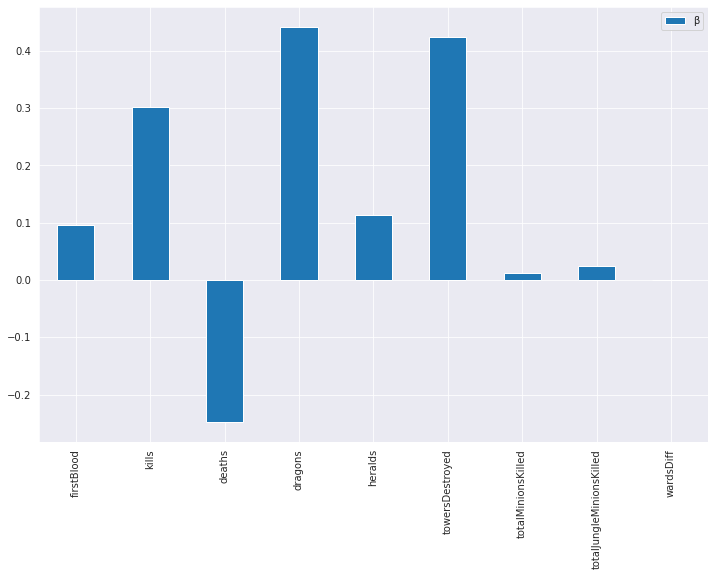

In [23]:
win_conditions.plot(kind='bar', figsize = (12, 8))

In [24]:
win_conditions['win %'] = (round(e ** win_conditions['β'], 2) * 100).astype(int)
win_conditions

β  win %
firstBlood                0.096656    110
kills                     0.301556    135
deaths                   -0.248081     78
dragons                   0.441752    156
heralds                   0.113967    112
towersDestroyed           0.423919    153
totalMinionsKilled        0.011802    101
totalJungleMinionsKilled  0.024403    102
wardsDiff                -0.000557    100

<AxesSubplot:>

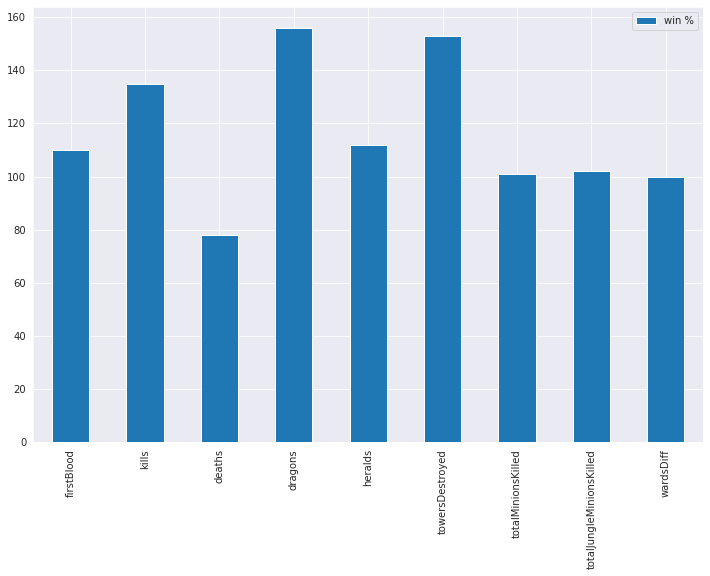

In [25]:
win_percentage = win_conditions.drop('β', axis=1)
win_percentage.plot(kind='bar', figsize = (12, 8))

## Results

### Curation process
My solution of getting data from keggle.com has proved quite useful. I've populated  a Pandas DataFrame of exactly 9879 records(rows) of high elo LOLs games played. The data I've gotten were really well put together, not many outliers or missing data were found. To verify this, I've used the DataFrame's isna() and duplicate() methods, as well as seaborn's heatmap to show the amount of missing values. To further unify my dataset, I've only used integer and float data-types, which means, that for columns that required booleans I've used 0 a 1 values. To find the answers to my research questions, I've reduced dimensions of the dataset to be more readable, and created special column to address wards placement differences.

### Statistic insight
Which wasn't a surprise, most of the values of means and maximums were kept really low, which assured me that the data I've gotten were really recorded in an early stage of each game. I was certainly aware of a few outliers that I've found throughout my dataset, but I decided to leave them, because they simulate good game variability, which I like.

### Visualization
Throughout my visualization processes seaborn's tools, especially heatmaps, proved really useful. 
- From my correlation heatmap I could tell that attributes which correlate with my target(win) the most were player kills, total minions killed and number of slain dragons.
- From Principal Component Analysis, I've found out that over 80% of the variance in my 10 predictor columns coud by explained by at least 6 amount of attributes.
- From associating each component (I used 8 components, because I wanted to have more than 90% variance explained), after using an unsupervised PCA method, with original dataset's column names, I came to realize that player deaths, total minions killed and first blood were the most important in explaining the variance of the data. This was important to me, because these columns could help me identify which attributes were the most crucial to decide whether or not a team would win in the end.

### Logistic Regression
From my log. coefficients plot, I could say, that towers destroyed, dragons slain and player kills were the most helpful to the team. Deaths on the other hand, were really contraproductive. With these coefficients in hand, I've used a conversion to see, by how much these attributes have boosted a team's hope for the victory. Therefore, on the last graph of the Lofistic Regression chapter we can see the values on percent scale.
- (hint) = Lets say that each team that starts the game has a 100% chance of victory, if by getting a first blood has graph shown a value of 118%, that just means, the team's hope for victory has risen by 18%


## Conclusion
My final statements would be as follows:
- From greatest to least, towers destroyed, dragons slain and player kills were the most important attributes to secure victory, according to my Logistic Regression model
- From greatest to least, player kills, minions killed and dragons slain were the most important attributes to secure victory, according to my correlation heatmap.
- From the difference in placed wards, I can state that placing more wards than your opponent will not give you such great advantage than focusing on before mentioned attributes. It's not that productive, but not contraproductive either.
- It is very obvious, that player deaths will significantly lower your team's chance of winning, exactly by 21%, according to the percentage conversion I've done using logistic coefficients (betas).

When a team is playing in early stage of the game, they should focus on killing their opponents, minions, conquering dragons and hitting the turrets as much as possible. They should definitely avoid dying and prioritize purchasing items and leveling up, before buying a lot of wards and searching for a good place to set them.

## Self critique

If I were to do this project all over again, I would have probably prefered to scrape the data myself from the most actual game analytics made available by Riot Games's API. It would not only make the project more up to date, but it would also allow me to choose the features I want to have in my dataset, which would've lessen my work in removing redundant attributes.

I'm overall very satisfied with what processes for the data curation and visualization I've chosen, same goes for the libraries that made them usable.

I think the strongest value of my project would be my personal interest in a topic and thus a more professional look on what features to include in my studied dataset.

Creative aspect of my project would definitely be the area of research. To me it feels quite different to introduce an online game's environment to the reader, and present it to the top of its capabilities. I don't see myself as an "everyone has to game" protagonist, but it felt good working with something I know and can share.

Weak points of the project would probably be me and my poor knowledge of python library's documentations and the data mining processes in general. Which is kind of obvious, but for me this was a first time - get in touch - moment with most of the algorithms and that left a bigger margin for an error to happen.